#  相図のプロット
以下の微分方程式を`ode45`を使って解く方法
$$
\begin{cases}
    \dot{x}_{1}=x_1-2x_2+1 \\
    \dot{x}_{2}=x_1-x_2+3
\end{cases}
$$

**【注意】**
鞍点が含まれている場合には時間範囲`tspan`の上限は当然自由に取れない。
```
[t,tmp]=ode45(ODE,tspan,[x_ini(ind,1);x_ini(ind,2)]);
```
で解いだ後に`t`の最大値が`tspan`の上限と一致しない場合には適宜修正を行うべきである。



## 変数の範囲の設定
`tspan`について、解が発散する場合には上限を適切に変える必要がある。

In [22]:
x1=-16:1:6; % 変数x1の範囲 
x2=-12:1:6; % 変数x2の範囲
tmax=10; % 時刻の上限
tspan=linspace(0,tmax,50); % 時刻の範囲
x0=[-5 -2]; % 平衡点
x_ini=[-5 -1; -5 0; -5 1; -5 2;]; % t=0における複数の位置ベクトル

## 微分方程式の定義

[`ode45`](https://jp.mathworks.com/help/matlab/ref/ode45.html)を用いた微分方程式の求解

In [23]:
ODE=@(t,x)[x(1)-2*x(2)+1;
           x(1)-x(2)+3];

## ノンスティッフ微分方程式の求解

In [24]:
sol=zeros(length(tspan),2,length(x0));
for ind=1:length(x_ini) 
    [t,tmp]=ode45(ODE,tspan,[x_ini(ind,1);x_ini(ind,2)]); 
    if(max(t)~=tmax)
        tspan_tmp=linspace(0,max(t),50);
        [t,tmp]=ode45(ODE,tspan_tmp,[x_ini(ind,1);x_ini(ind,2)]); 
    end
    sol(:,:,ind)=tmp;
end

## ベクトル場のプロット
`quiver`関数を使ってベクトル場をプロットする。あらかじめ`meshgrid`で相空間上の座標情報テーブルを作成しておく必要がある。
当然であるが、定義した微分方程式とコンシステントに設定する必要がある。

In [25]:
[x1,x2]=meshgrid(x1,x2); 
dx1=x1-2*x2+1; 
dx2=x1-x2+3;
dx=sqrt(dx1.^2+dx2.^2);
dx1=dx1./dx; dx2=dx2./dx; % 長さ1に正規化

## 相図のプロット

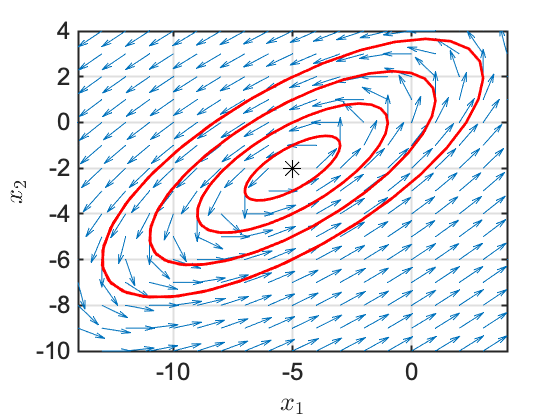

In [26]:
f=figure;
ax=gca; 
box on; 
quiver(x1,x2,dx1,dx2) % ベクトル場のプロット
hold on
for ind=1:length(x_ini)
    plot(sol(:,1,ind),sol(:,2,ind),'r-','LineWidth',2) % ode45で解いた軌跡のプロット
end
plot(x0(:,1),x0(:,2),'k*','MarkerFaceColor','k','MarkerSize',12) % 平衡点のプロット
grid on
xlabel('$$x_1$$','InterPreter','latex')
ylabel('$$x_2$$','InterPreter','latex')
set(ax,'FontSize',18);
set(ax,'FontName','Arial')
set(ax,'LineWidth',1.5)
xlim([-14 4])
ylim([-10 4])